In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
sys.path.append(os.path.dirname(os.getcwd()))

# import pickle

In [9]:
print(os.path.dirname(os.getcwd())+'/test_interval_width/')
event_files = [f for f in os.listdir(os.path.dirname(os.getcwd())+'/test_interval_width/') if "npy" in f]

/home/anibal-pc/roman_rubin/test_interval_width/


In [45]:
for i,key in enumerate(['t_center', 'u_center', 'tE', 'rho', 's','q','alpha','piEN', 'piEE']):
    print(i,key)

0 t_center
1 u_center
2 tE
3 rho
4 s
5 q
6 alpha
7 piEN
8 piEE


In [47]:
met_1_dict = {'t_center':[], 'u_center':[], 'tE':[], 'rho':[], 's':[],'q':[],'alpha':[],'piEN':[], 'piEE':[]}
met_2_dict = {'t_center':[], 'u_center':[], 'tE':[], 'rho':[], 's':[],'q':[],'alpha':[],'piEN':[], 'piEE':[]}
met_3_dict = {'t_center':[], 'u_center':[], 'tE':[], 'rho':[], 's':[],'q':[],'alpha':[],'piEN':[], 'piEE':[]}
R = []
for i in range(len(event_files)):   
    event_fit = np.load(os.path.dirname(os.getcwd())+'/test_interval_width/'+event_files[i], allow_pickle = True).item()    
    best_model = event_fit['best_model'][0:9]
    true_params = np.array([event_fit['true_params'][key] for key in ['t_center', 'u_center', 'tE', 'rho', 's','q','alpha','piEN', 'piEE']])
    # print(true_params)
    R.append(event_fit['rango'])
    sigma  = np.sqrt(np.diag(event_fit['covariance_matrix']))[0:9] 
    met_1 = abs(best_model - true_params)/true_params
    met_2 = abs(best_model - true_params)/sigma 
    met_3 = sigma/best_model

    for i,key in enumerate(['t_center', 'u_center', 'tE', 'rho', 's','q','alpha','piEN', 'piEE']):
        met_1_dict[key].append(met_1[i])
        met_2_dict[key].append(met_2[i])
        met_3_dict[key].append(met_3[i])
    

/tmp/ipykernel_346693/3906270276.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


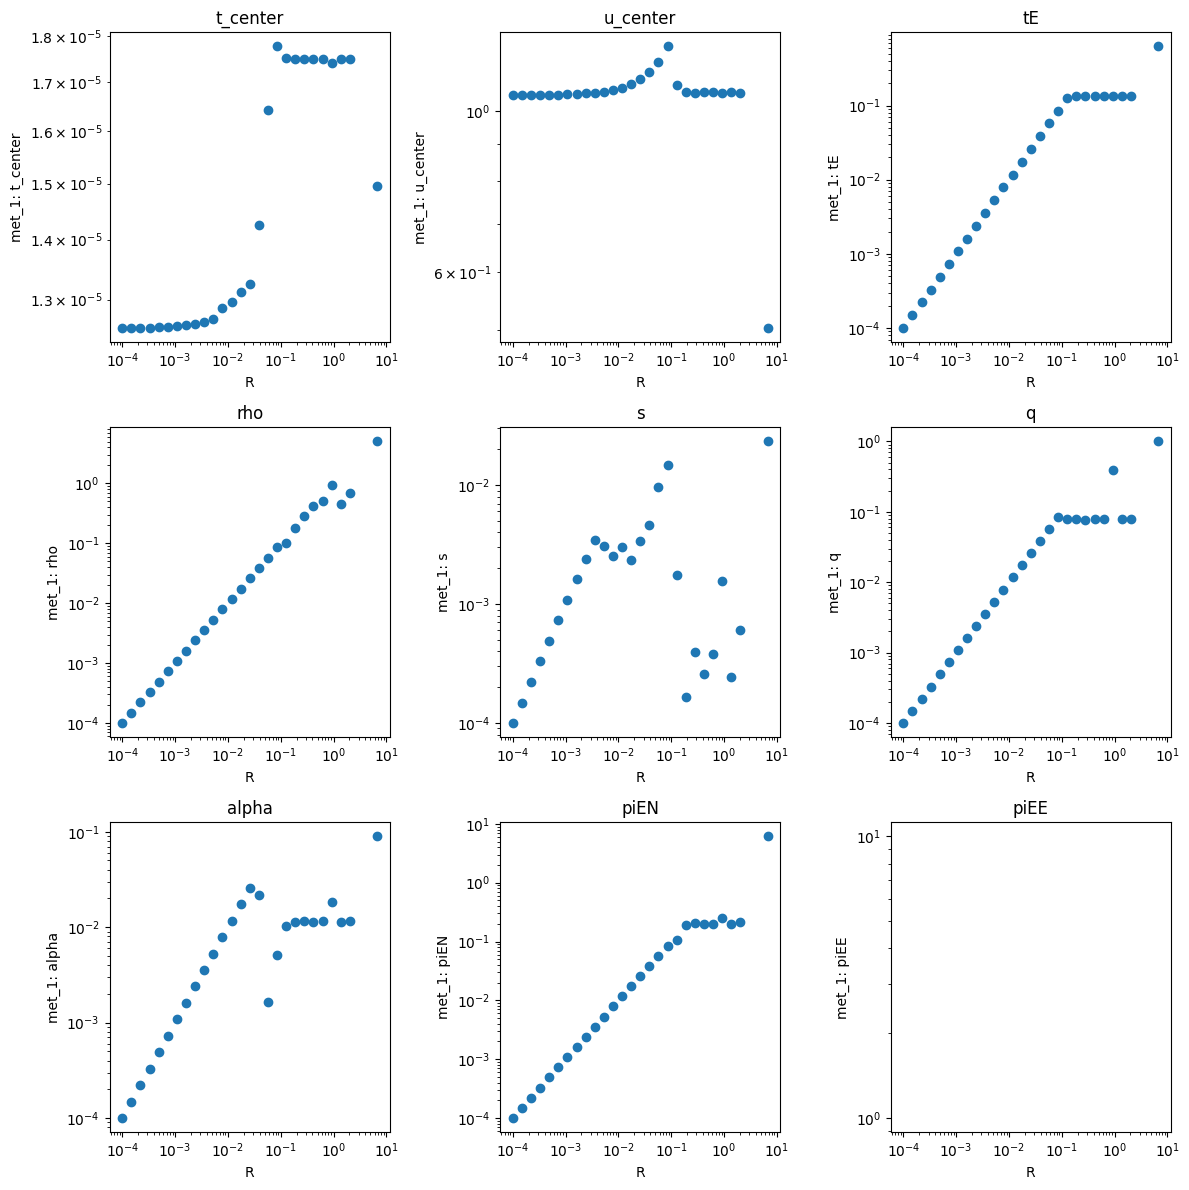

In [58]:
import matplotlib.pyplot as plt

keys = ['t_center', 'u_center', 'tE', 'rho', 's', 'q', 'alpha', 'piEN', 'piEE']
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Creates a 3x3 grid of subplots

for ax, key in zip(axes.flat, keys):
    ax.plot(R, met_1_dict[key], marker='o', ls='')
    ax.set_xlabel('R')
    ax.set_ylabel(f'met_1: {key}')
    ax.set_title(key)
    ax.set_xscale("log")
    ax.set_yscale("log")
plt.tight_layout()
plt.show()

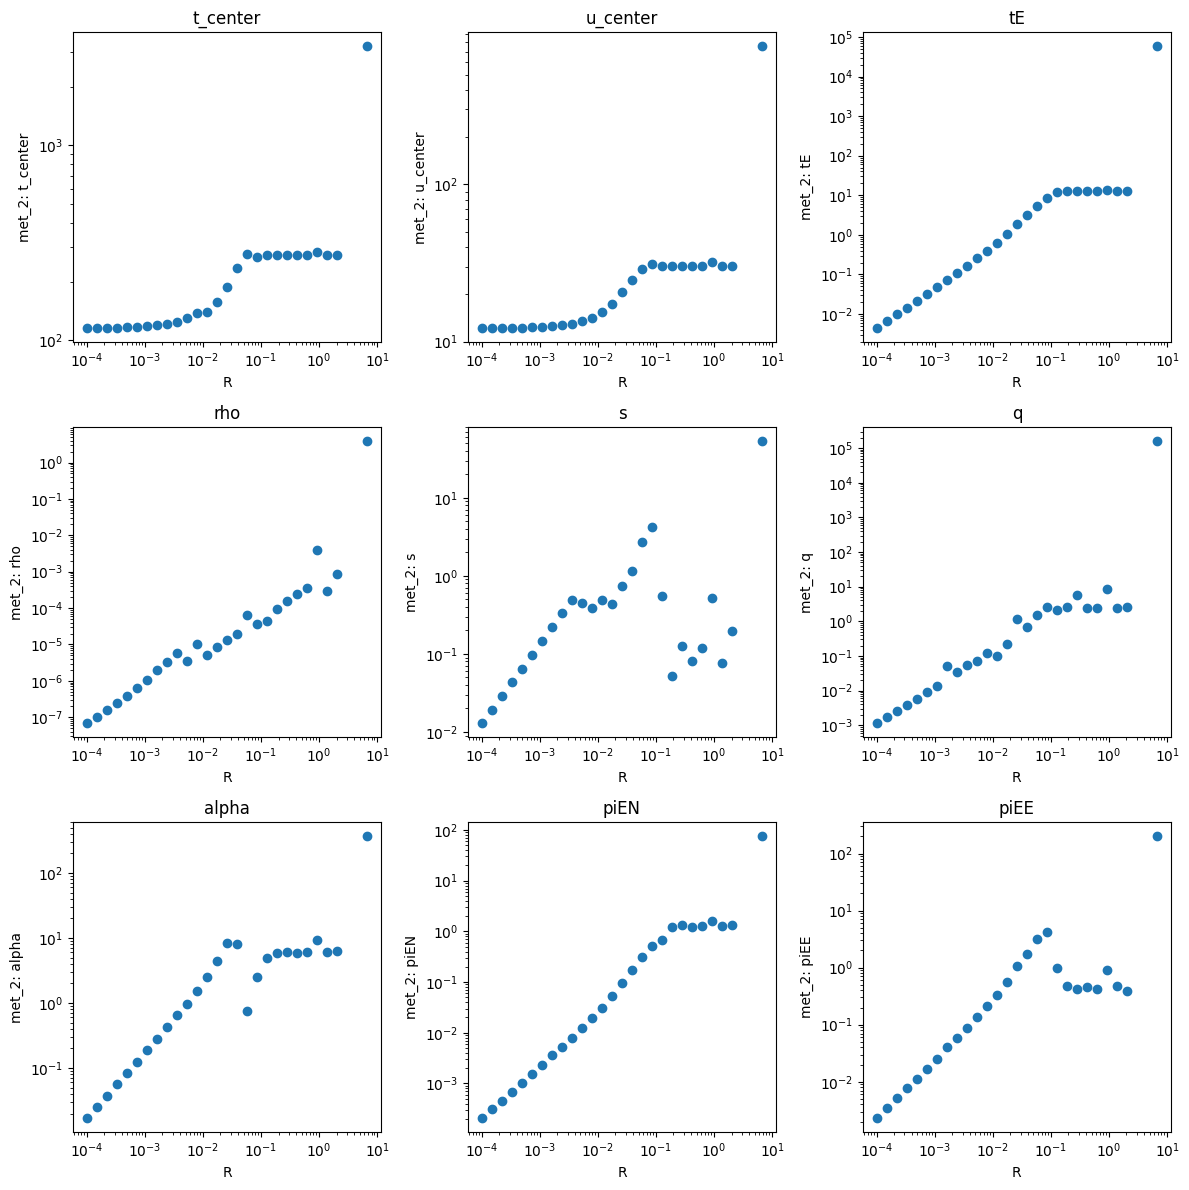

In [61]:
import matplotlib.pyplot as plt

keys = ['t_center', 'u_center', 'tE', 'rho', 's', 'q', 'alpha', 'piEN', 'piEE']
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Creates a 3x3 grid of subplots

for ax, key in zip(axes.flat, keys):
    ax.plot(R, met_2_dict[key], marker='o', ls='')
    ax.set_xlabel('R')
    ax.set_ylabel(f'met_2: {key}')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(key)

plt.tight_layout()
plt.show()

In [68]:
met_3_dict

{'t_center': [6.377621242852e-08,
  1.0871635613461524e-07,
  1.0506174939639953e-07,
  8.305102997629803e-08,
  1.0819322767980083e-07,
  1.037261401335912e-07,
  1.0784976448836125e-07,
  6.37113409610441e-08,
  1.0136394364526859e-07,
  6.362098976149093e-08,
  1.0654037534172419e-07,
  1.0857151371282006e-07,
  1.0842511192559266e-07,
  6.37455114206701e-08,
  4.640128987884485e-09,
  9.773307371992673e-08,
  6.37607579321337e-08,
  6.095145465765133e-08,
  9.332972288248314e-08,
  6.677523579831068e-08,
  9.378422713887075e-08,
  7.093412458361756e-08,
  6.375883313720629e-08,
  5.9371910963574525e-08,
  6.146909402480066e-08,
  6.408854423533271e-08,
  1.0731858697747845e-07],
 'u_center': [0.01712876082380743,
  0.04206614404324713,
  0.040941525560487343,
  0.03010025980614243,
  0.0418942604458436,
  0.04037099466577989,
  0.041771926241772804,
  0.01710382277516517,
  0.03952657969996168,
  0.01703301242436627,
  0.041333510957454925,
  0.042034417201129576,
  0.0419772031988

/tmp/ipykernel_346693/443515710.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


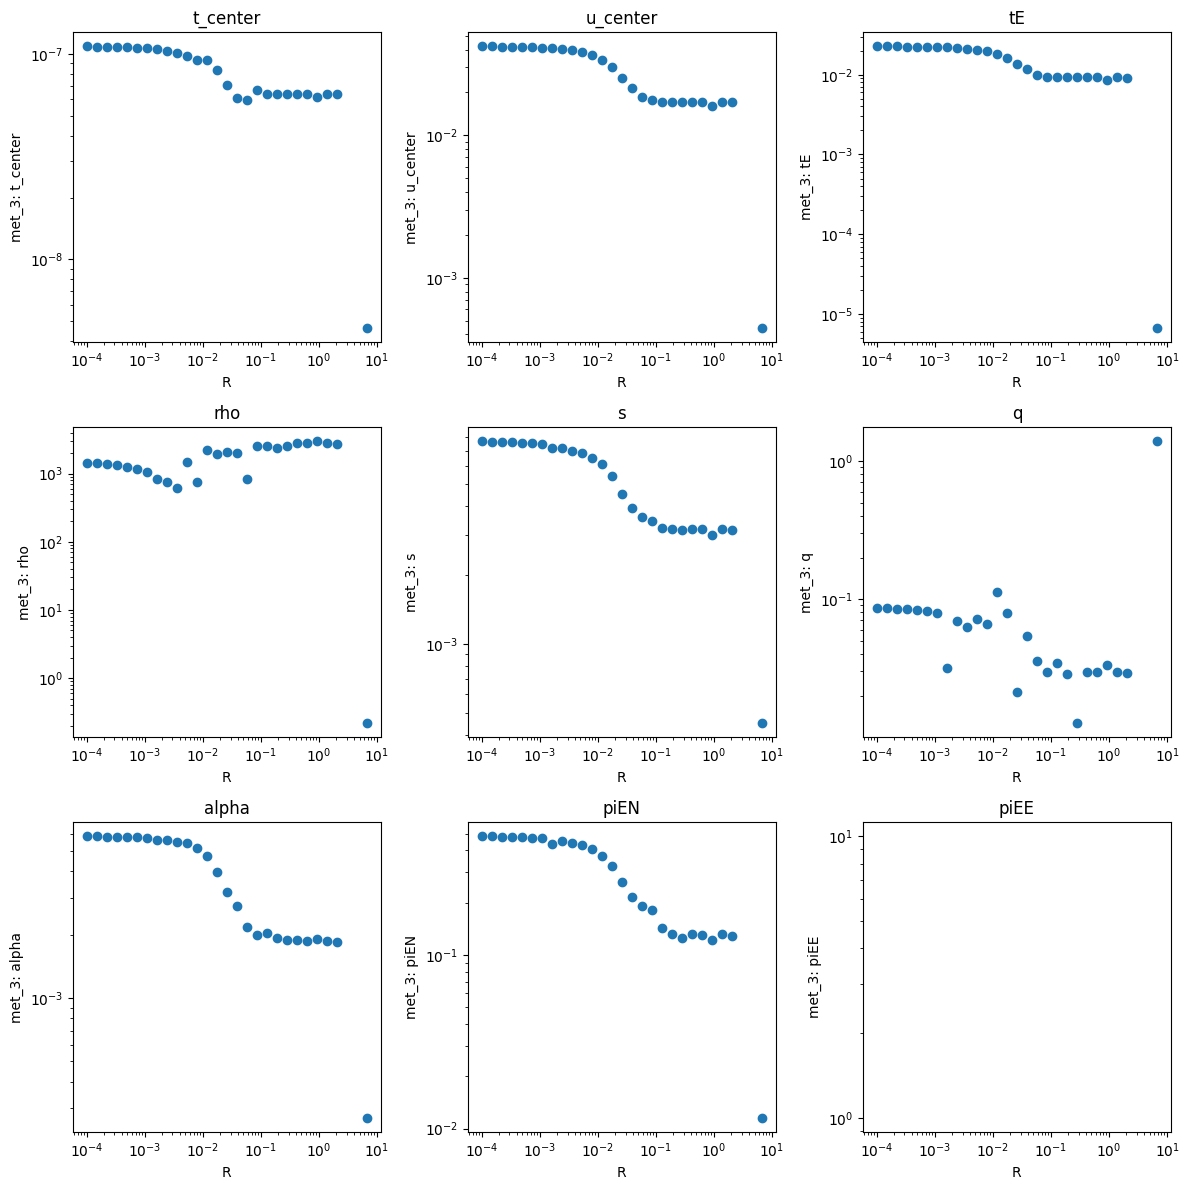

In [70]:
import matplotlib.pyplot as plt

keys = ['t_center', 'u_center', 'tE', 'rho', 's', 'q', 'alpha', 'piEN', 'piEE']
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Creates a 3x3 grid of subplots

for ax, key in zip(axes.flat, keys):
    ax.plot(R, met_3_dict[key], marker='o', ls='')
    ax.set_xlabel('R')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(f'met_3: {key}')
    ax.set_title(key)

plt.tight_layout()
plt.show()

28


/tmp/ipykernel_346693/2490123252.py:72: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


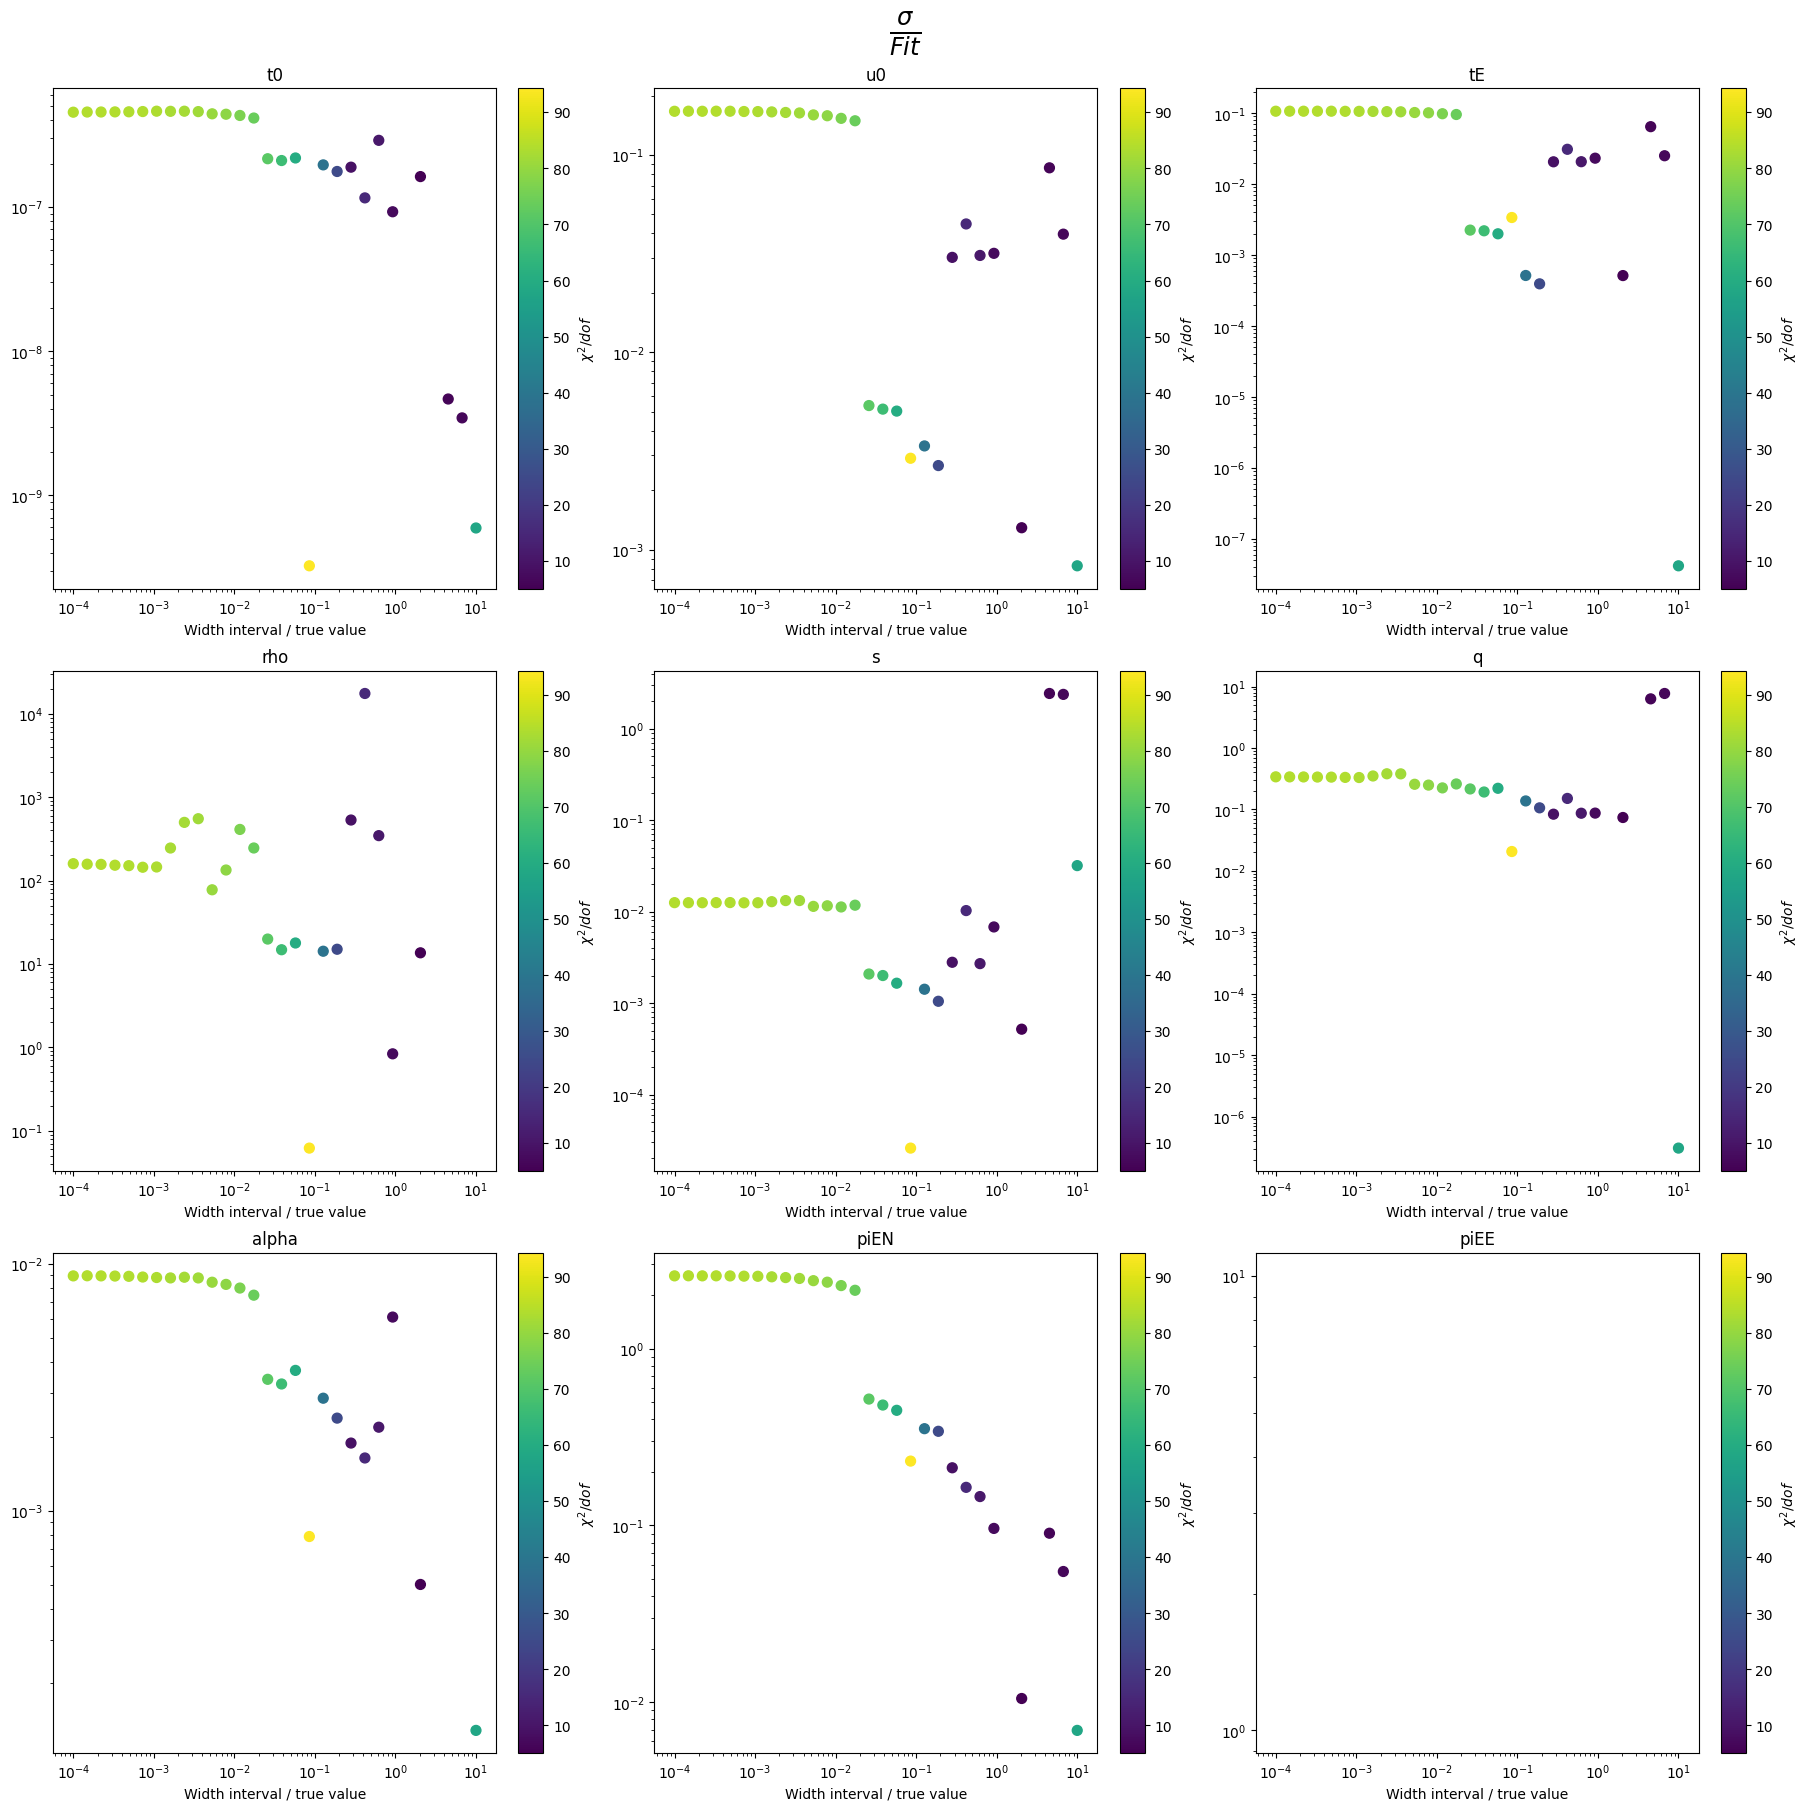

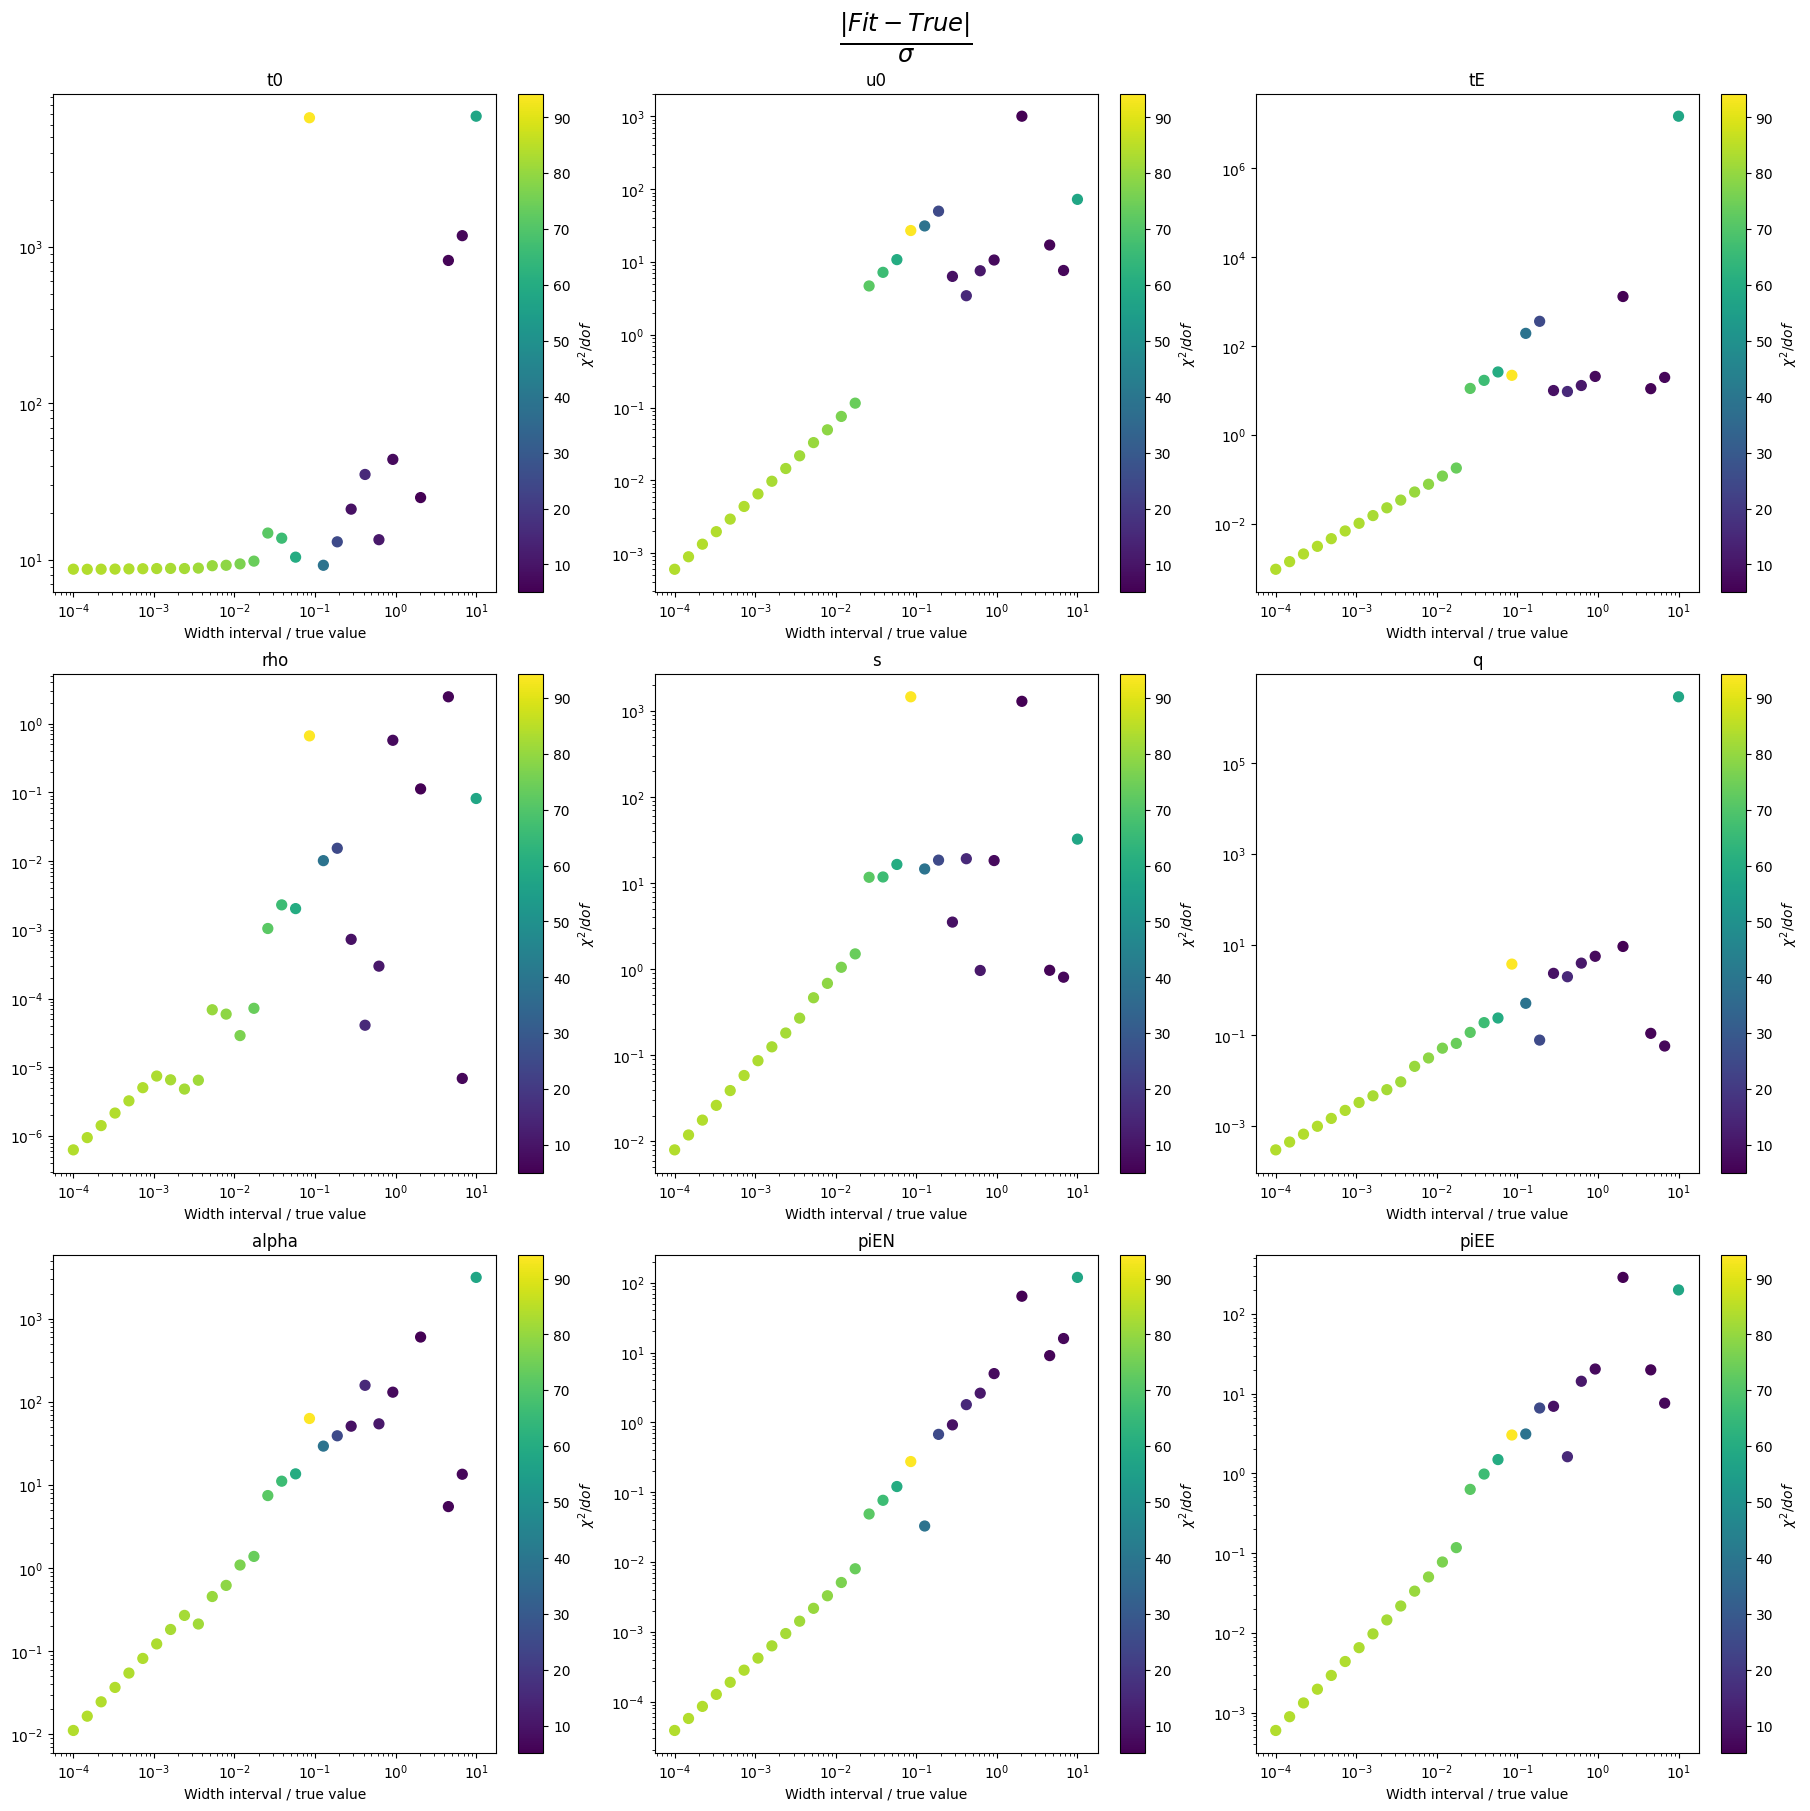

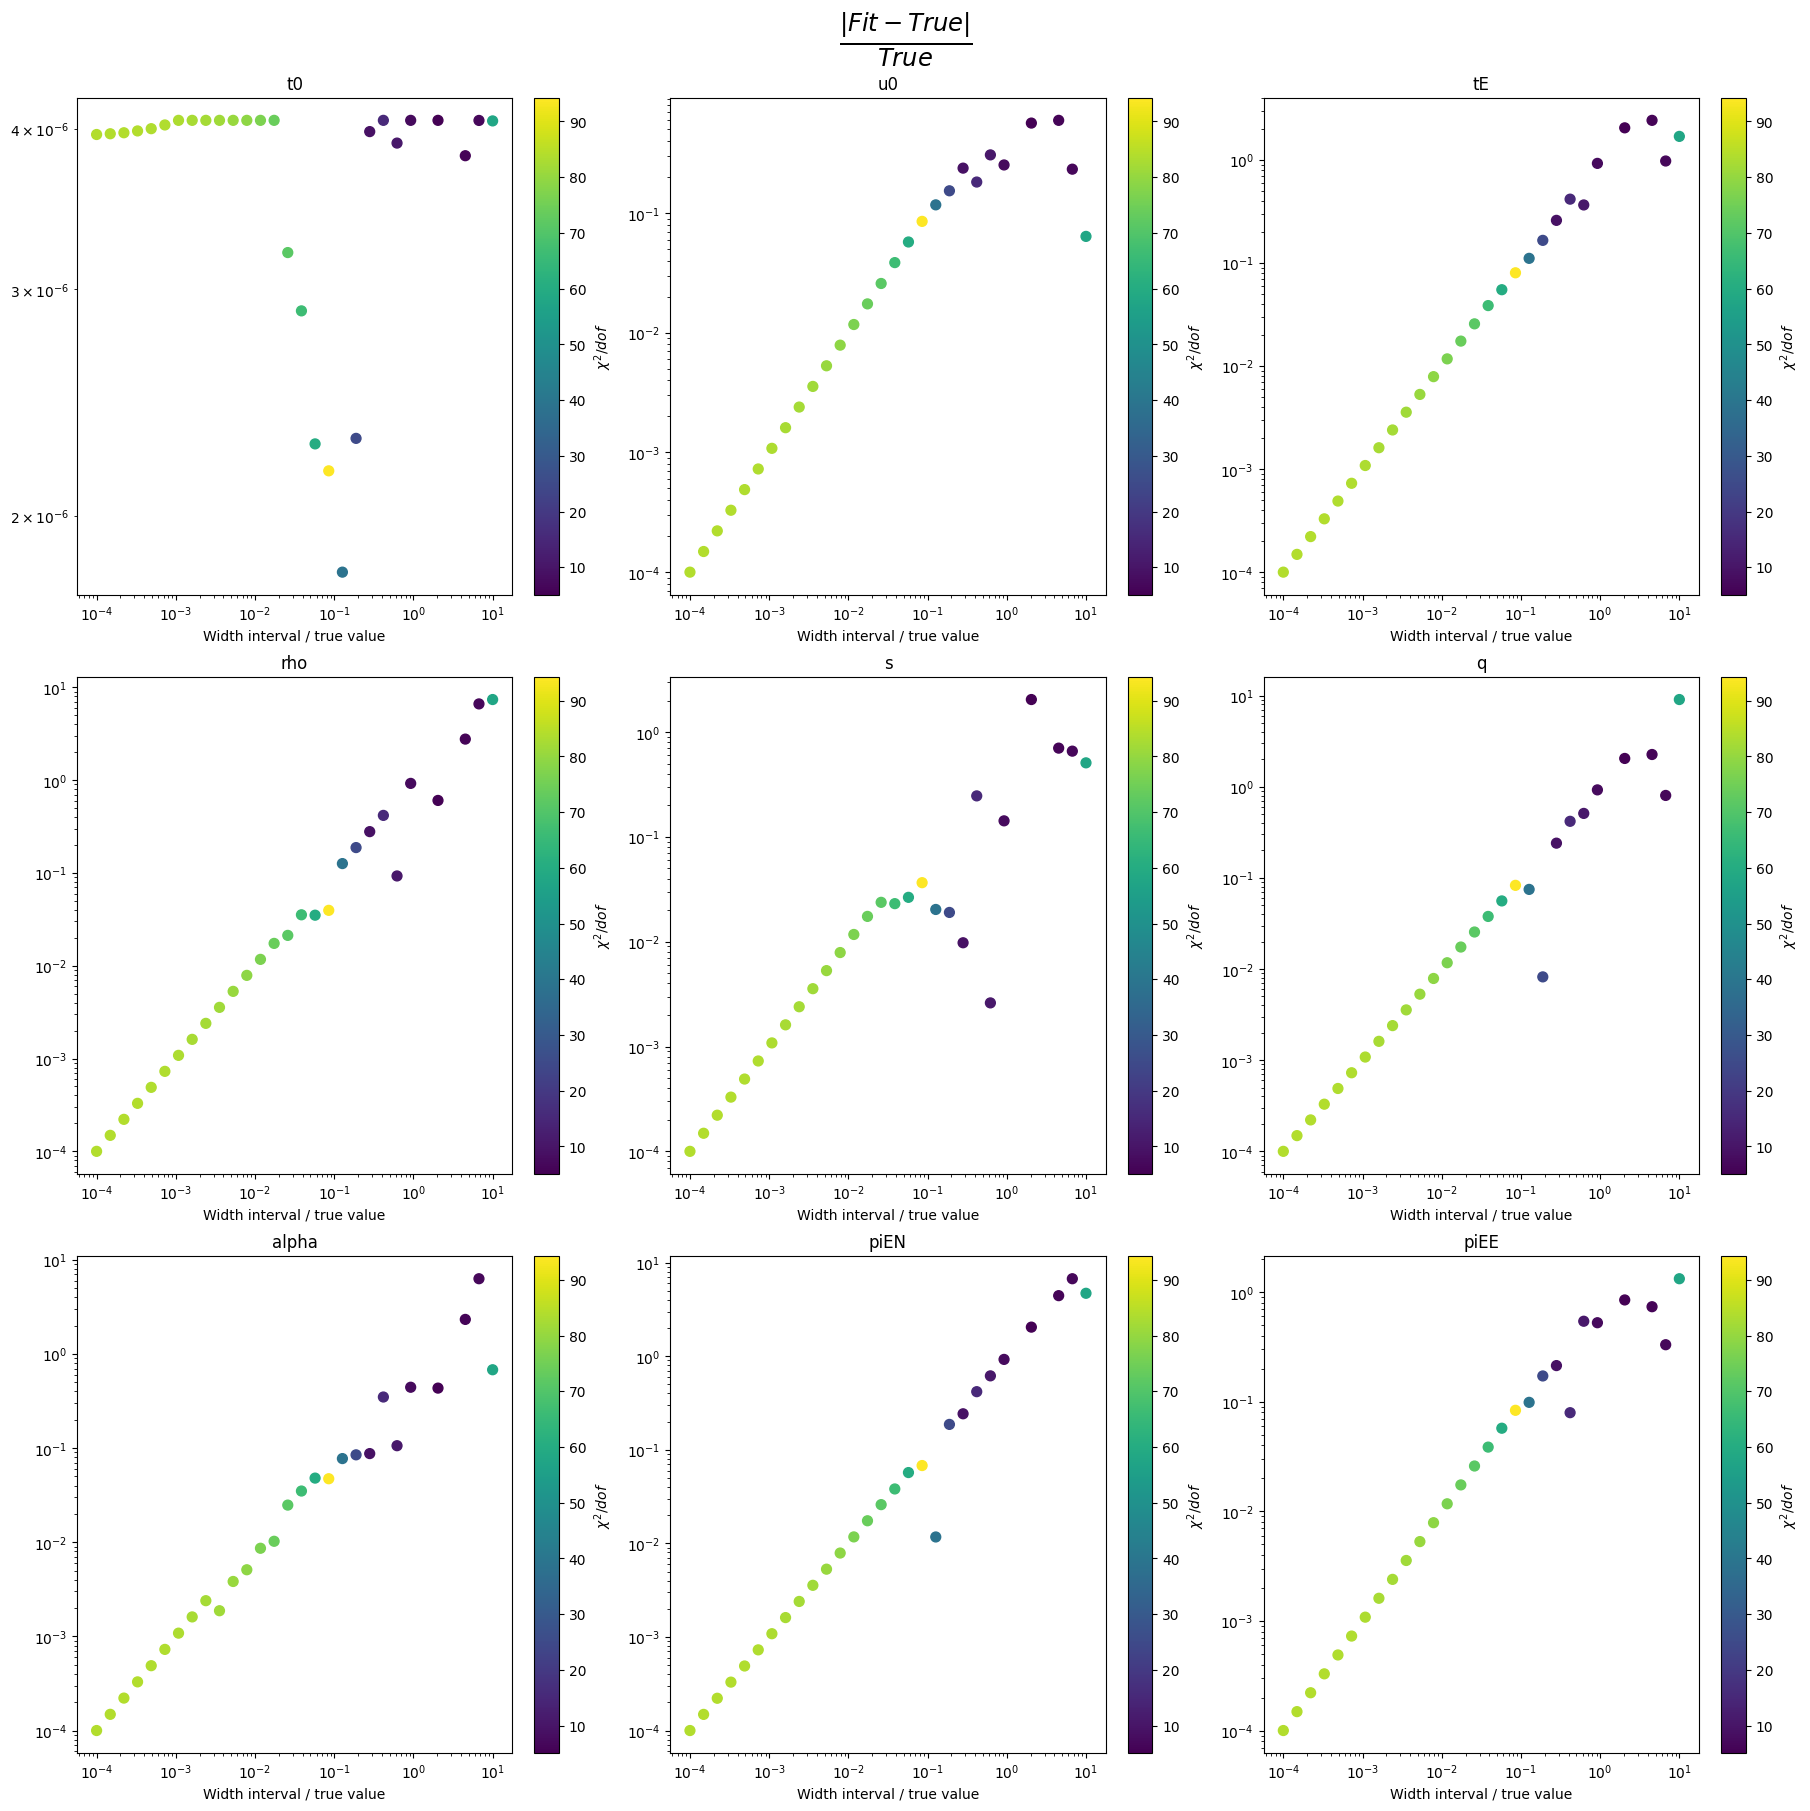

In [67]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
sys.path.append(os.path.dirname(os.getcwd()))
from class_functions_roman_rubin import sim_events
import pickle
import h5py

path_save_event = os.path.dirname(os.getcwd())+'/test_interval_width/sim_event/'

with open(path_save_event+"Event_18.pkl", "rb") as archivo:
    evento_restaurado = pickle.load(archivo)

with open(path_save_event+"tel_rr_18.pkl", "rb") as archivo:
    tel_rr_rest = pickle.load(archivo)



def leer_de_h5(file_name):
    with h5py.File(file_name, 'r') as archivo_h5:
        matriz = archivo_h5['covariance_matrix'][:]
        array = archivo_h5['best_model'][:]
        lista = archivo_h5.attrs['rango']
        flotante = archivo_h5.attrs['chi2']
    return matriz, array, lista, flotante



h5_files = [f for f in os.listdir('/home/anibal-pc/test_width_class/') if 'h5' in f]
print(len(h5_files))

key_params = ['t0','u0','tE', 'rho', 's','q','alpha','piEN', 'piEE']
chi2_results = []
met_3 = {key: [] for key in key_params}
met_2 = {key: [] for key in key_params}
met_1 = {key: [] for key in key_params}
width = []

matriz, best_model, rango, chi2 = leer_de_h5('/home/anibal-pc/test_width_class/'+h5_files[0])
dof = int(tel_rr_rest.total_number_of_data_points()-len(best_model))

# dof
true_values = evento_restaurado.ulens_params()
for j in range(len(h5_files)):
    matriz, best_model, rango, chi2 = leer_de_h5('/home/anibal-pc/test_width_class/'+h5_files[j])
    # k = 2
    for k in range(len(key_params)):
        sigma= np.sqrt(np.diag(matriz))[0:9][k]
        # best_model= 
        met_3[key_params[k]].append(sigma/best_model[0:9][k])
        met_2[key_params[k]].append(np.abs(best_model[0:9][k] - true_values[key_params[k]]) /sigma)
        met_1[key_params[k]].append(np.abs(best_model[0:9][k] - true_values[key_params[k]]) / abs(true_values[key_params[k]]))
    width.append(rango)
    chi2_results.append(chi2/dof)

# Create a grid of subplots
n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_3[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_3[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)
plt.suptitle(r"$\frac{\sigma}{Fit}$", fontsize=25)
# Show the grid of plots
plt.show()

n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_2[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_2[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)
plt.suptitle(r"$\frac{|Fit-True|}{\sigma}$", fontsize=25)
# Show the grid of plots
plt.show()


n_cols = 3
n_rows = -(-len(key_params) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each key in the grid
for idx, key in enumerate(key_params):
    ax = axes[idx]
    scatter = ax.scatter(width, met_1[key], c=chi2_results, cmap='viridis', s=50)
    ax.plot(width, met_1[key], ls='', lw=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Add labels, title, and colorbar
    ax.set_xlabel('Width interval / true value')
    # ax.set_ylabel(r'$\sigma/fit$')
    ax.set_title(key)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(r'$\chi^2/dof$')

# Hide any unused subplots
for ax in axes[len(key_params):]:
    ax.set_visible(False)

# Show the grid of plots
# plt.suptitle('')

# fig.text(0.5, 0.01, "Width of interval", ha='center', fontsize=25)
plt.suptitle(r"$\frac{|Fit-True|}{True}$", fontsize=25)
# plt.tight_layout(rect=[0.05, 0.05, 1, 0.95]) 
plt.show()
   